[![img](..\ep8_2018-57x57.png)](http://endlesspint.com/)

# HBO Greatest Fighter of All Time Tournament Simulation
## Reverse ELO, Re-seeding, & Re-running

**post @** [endlesspint.com](http://endlesspint.com/2018-12-06-hbo-greatest-fighter-of-all-time-tournament-simulation/)

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
match_ups_rev_chron = pd.read_excel("hbo_greatest_fighter.xlsx", sheet_name="tourn_matchups")
match_ups_rev_chron.head()

,Poll A,Favorite,Poll B,Opponent
0,0.76,Ali,0.24,Leonard
1,0.55,Leonard,0.45,Mayweather
2,0.64,Ali,0.36,Tyson
3,0.81,Ali,0.19,Jones
4,0.69,Leonard,0.31,Hagler


In [3]:
fighter_elo = {fighter: '' for fighter in match_ups_rev_chron.Opponent.tolist()}
fighter_elo['Ali'] = 2600

## reverse ELO

In [4]:

# https://www.reddit.com/r/chess/comments/2y6ezm/how_to_guide_converting_elo_differences_to/

def rev_elo(a_elo, a_prob):
    b_elo = a_elo + (np.log10((1.-a_prob)/a_prob) * 400)
    return b_elo

# Ali v Leonard
rev_elo(fighter_elo['Ali'], 0.76)

2399.759059772326

## win prob

In [5]:

def prob_elo(a_elo, b_elo):
    a_prob = 1./(1. + 10**((b_elo - a_elo)/400.))
    return a_prob

# Ali v Leonard
prob_elo(fighter_elo['Ali'], rev_elo(fighter_elo['Ali'], 0.76))

0.7599999999999998

## reverse elo pandas

In [6]:


def rev_elo_pd(row):
    a_elo = fighter_elo[row['Favorite']]
#     print (a_elo)
    a_prob = row['Poll A']
#     print (a_prob)
    b_elo = a_elo + (np.log10((1.-a_prob)/a_prob) * 400)
    fighter_elo[row['Opponent']] = b_elo
    return b_elo

match_ups_rev_chron.apply(rev_elo_pd, axis=1)

0     2399.759060
1     2364.898989
2     2500.049011
3     2348.107433
4     2260.764101
5     2264.948000
6     2458.154871
7     2380.131231
8     2018.062056
9     2272.443459
10    2269.885892
11    2032.759267
12    2129.820527
13    2034.784882
14    2402.083389
15    2236.801071
16    1950.405096
17    2272.443459
18    2384.823003
19    2138.202277
20    2253.814463
21    2064.707060
22    2294.085084
23    2373.181593
24    1997.190851
25    1760.942019
26    1954.537726
27    1822.854111
28    2122.870889
29    1999.924811
30    2211.234887
dtype: float64

In [7]:
len(fighter_elo), fighter_elo

(32,
 {'Ali': 2600,
  'Arguello': 2018.062055996596,
  'Barrera': 1999.924811287957,
  'Chavez': 2402.08338923934,
  'Chocolatito': 1822.8541109415842,
  'Cotto': 2236.801071405325,
  'De La Hoya': 2138.202277167716,
  'Duran': 2458.1548705053547,
  'Foreman': 2264.948000198126,
  'Frazier': 2269.885892090751,
  'GGG': 2253.814462583364,
  'Hagler': 2260.764101011133,
  'Hearns': 2373.181592824921,
  'Holmes': 2034.7848815755171,
  'Holyfield': 2272.443459330131,
  'Hopkins': 2129.8205272566006,
  'Jones': 2348.107432829672,
  'Leonard': 2399.759059772326,
  'Lewis': 2380.13123125269,
  'Lomachenko': 2272.443459330131,
  'Marquez': 2211.2348873514748,
  'Mayweather': 2364.898989484766,
  'Morales': 2294.085084469735,
  'Mosley': 1950.4050963564546,
  'Pacquiao': 2384.8230033135146,
  'Pryor': 1954.537725864619,
  'Sanchez': 1997.1908513305673,
  'Spinks': 1760.9420189489997,
  'Trinidad': 2064.707059970452,
  'Tyson': 2500.04901071336,
  'Ward': 2122.8708888288315,
  'Whitaker': 2032.7

## elo win prob matrix/grid

In [8]:
grid_rev_elo = pd.read_excel("hbo_greatest_fighter.xlsx", sheet_name="grid_RevELO")

grid_rev_elo = grid_rev_elo[grid_rev_elo.Region.notnull()]
grid_rev_elo = grid_rev_elo.reset_index(drop=True)
print(grid_rev_elo.shape)
print(grid_rev_elo.dtypes)
grid_rev_elo.head()

(32, 36)
Region          object
SEED           float64
Fighter         object
ELO            float64
Ali            float64
Cotto          float64
Hearns         float64
Lewis          float64
Jones          float64
De La Hoya     float64
Whitaker       float64
Chocolatito    float64
Duran          float64
Morales        float64
Chavez         float64
Marquez        float64
Frazier        float64
Pryor          float64
Pacquiao       float64
Tyson          float64
Mayweather     float64
Lomachenko     float64
Holyfield      float64
Spinks         float64
Holmes         float64
Barrera        float64
Foreman        float64
Trinidad       float64
Leonard        float64
Mosley         float64
Arguello       float64
Sanchez        float64
Hopkins        float64
Ward           float64
Hagler         float64
GGG            float64
dtype: object


,Region,SEED,Fighter,ELO,Ali,Cotto,Hearns,Lewis,Jones,De La Hoya,...,Foreman,Trinidad,Leonard,Mosley,Arguello,Sanchez,Hopkins,Ward,Hagler,GGG
0,LAMPLEY,1.0,Ali,2600.000000,NaN,0.890000,0.786788,0.780000,0.810000,0.934522,...,0.873107,0.956119,0.760000,0.976783,0.966102,0.969823,0.937413,0.939720,0.875752,0.880039
1,LAMPLEY,8.0,Cotto,2236.801071,0.110000,NaN,0.313228,0.304688,0.345081,0.638205,...,0.459582,0.729217,0.281292,0.838706,0.778882,0.798880,0.649269,0.658324,0.465569,0.475535
2,LAMPLEY,4.0,Hearns,2373.181593,0.213212,0.686772,NaN,0.490000,0.536022,0.794562,...,0.650910,0.855168,0.461826,0.919361,0.885364,0.897005,0.802326,0.808595,0.656363,0.665329
3,LAMPLEY,5.0,Lewis,2380.131231,0.220000,0.695312,0.510000,NaN,0.545956,0.801016,...,0.659945,0.860053,0.471783,0.922278,0.889362,0.900642,0.808595,0.814710,0.665329,0.674177
4,LAMPLEY,3.0,Jones,2348.107433,0.190000,0.654919,0.463978,0.454044,NaN,0.770000,...,0.617442,0.836359,0.426210,0.907992,0.869880,0.882885,0.778433,0.785256,0.623114,0.632462


In [9]:
fighters = grid_rev_elo[['Region', 'SEED', 'Fighter', 'ELO']]
fighters.head()

,Region,SEED,Fighter,ELO
0,LAMPLEY,1.0,Ali,2600.000000
1,LAMPLEY,8.0,Cotto,2236.801071
2,LAMPLEY,4.0,Hearns,2373.181593
3,LAMPLEY,5.0,Lewis,2380.131231
4,LAMPLEY,3.0,Jones,2348.107433


In [10]:
fighter_win_prob = np.matrix(grid_rev_elo.iloc[:,4:])

# Ali v Leonard
i, j = fighters[fighters.Fighter=="Ali"].index[0], fighters[fighters.Fighter=="Leonard"].index[0]
fighter_win_prob[i, j]

0.7599999999999998

In [11]:
np.random.seed(8)

fighter_cnt = int(fighters.shape[0])
tourn_rds = int(np.log2(fighter_cnt))

wins_tally = np.zeros(fighter_cnt * tourn_rds).reshape(fighter_cnt, tourn_rds)


for _ in range(10000):
    
    fighter_no = range(fighters.shape[0])
    round_ = 0
    
    while len(fighter_no) >= 2:
        fighter_no_advance = []
        # https://stackoverflow.com/questions/5389507/iterating-over-every-two-elements-in-a-list
        for i,j in zip(fighter_no[0::2], fighter_no[1::2]):

            toss_up = np.random.uniform()
#             print(rd_1_fighters[i], fighter_win_prob[i, j], rd_1_fighters[j], toss_up)

            if fighter_win_prob[i, j] > toss_up:
                wins_tally[i, round_] += 1
                fighter_no_advance.append(i)

            else:
                wins_tally[j, round_] += 1
                fighter_no_advance.append(j)

        fighter_no = fighter_no_advance
        round_ += 1


print(wins_tally[:5])

[[8916. 6967. 5949. 4279. 3492.]
 [1084.  343.  148.   35.   20.]
 [4947. 1354.  856.  377.  203.]
 [5053. 1336.  859.  384.  234.]
 [7679. 6755. 1921.  753.  385.]]


## hbo_10k_sim

In [12]:
df_wins_tally = pd.DataFrame(wins_tally)
df_wins_tally.columns = ['1R', 'S16', 'QF', 'SF', 'F']
hbo_10k_sim = pd.concat([fighters, df_wins_tally], axis=1)
# hbo_10k_sim.to_excel("hbo_10k_sim.xlsx")

hbo_10k_sim.sort_values(by=['F'], ascending=False)

,Region,SEED,Fighter,ELO,1R,S16,QF,SF,F
0,LAMPLEY,1.0,Ali,2600.000000,8916.0,6967.0,5949.0,4279.0,3492.0
24,LEDERMAN,1.0,Leonard,2399.759060,9315.0,8437.0,6189.0,4080.0,1510.0
15,MERCHANT,7.0,Tyson,2500.049011,6570.0,5315.0,3322.0,1650.0,1189.0
8,MERCHANT,1.0,Duran,2458.154871,7221.0,4535.0,2536.0,1118.0,746.0
16,KELLERMAN,1.0,Mayweather,2364.898989,6302.0,4101.0,2964.0,1642.0,550.0
10,MERCHANT,4.0,Chavez,2402.083389,7534.0,3718.0,1788.0,655.0,414.0
4,LAMPLEY,3.0,Jones,2348.107433,7679.0,6755.0,1921.0,753.0,385.0
18,KELLERMAN,4.0,Holyfield,2272.443459,9514.0,3971.0,2534.0,1024.0,236.0
3,LAMPLEY,5.0,Lewis,2380.131231,5053.0,1336.0,859.0,384.0,234.0
14,MERCHANT,2.0,Pacquiao,2384.823003,3430.0,2367.0,1107.0,395.0,228.0


# reseed, rebracket & rerun

## reseed

In [13]:
fighters_reseed = fighters.sort_values(by='ELO', ascending=False)
fighters_reseed['RESEED'] = np.arange(1, fighters.shape[0] + 1)

fighters_reseed.head()

,Region,SEED,Fighter,ELO,RESEED
0,LAMPLEY,1.0,Ali,2600.000000,1
15,MERCHANT,7.0,Tyson,2500.049011,2
8,MERCHANT,1.0,Duran,2458.154871,3
10,MERCHANT,4.0,Chavez,2402.083389,4
24,LEDERMAN,1.0,Leonard,2399.759060,5


## rebracket

![img](rebracket.gif)

In [14]:
def tourn_rebracket(no_seeds):
    
    new_seeds = np.arange(1, no_seeds+1)

    temp_bracket = new_seeds.copy()

    folds = np.log2(len(new_seeds))

    while folds > 0:
        if len(temp_bracket.shape) == 1:
            split_point = int(len(temp_bracket)/2)

            top_half = temp_bracket[:split_point]
            bot_half = np.flip(temp_bracket[split_point:], axis=0)

            temp_bracket = np.vstack((top_half, bot_half))

        else:
            split_point = int(temp_bracket.shape[1]/2)

            top_half = temp_bracket[:,:split_point]
            bot_half = np.flip(np.flip(temp_bracket[:,split_point:], 0), 1)

            temp_bracket = np.vstack((top_half, bot_half))

        folds -= 1

    return list(temp_bracket[:,0])

tourn_rebracket(16)

[1, 16, 9, 8, 5, 12, 13, 4, 3, 14, 11, 6, 7, 10, 15, 2]

## rerun I

**waaaay too slow, took to referencing pandas index below**

**these results can at least be used as a sanity check**

In [15]:

# def tourn_sim(df, elo_col, seed_col, sims=10000, elo_update=False):

#     fighter_cnt = int(df.shape[0])
#     tourn_rds = int(np.log2(fighter_cnt))
    
# #     tourn_bracket = 

#     wins_tally = np.zeros(fighter_cnt * tourn_rds).reshape(fighter_cnt, tourn_rds)


#     for _ in range(sims):

#         fighter_seeds = tourn_rebracket(fighter_cnt)
#         round_ = 0

#         while len(fighter_seeds) >= 2:
            
#             fighter_seeds_advance = []
            
#             # https://stackoverflow.com/questions/5389507/iterating-over-every-two-elements-in-a-list
#             for i,j in zip(fighter_seeds[0::2], fighter_seeds[1::2]):
                
#                 fighter_a_elo = df[df[seed_col]==i][elo_col].values[0]
#                 fighter_b_elo = df[df[seed_col]==j][elo_col].values[0]
                
#                 fighter_a_idx = df[df[seed_col]==i].index[0]
#                 fighter_b_idx = df[df[seed_col]==j].index[0]

#                 toss_up = np.random.uniform()
    
#                 if prob_elo(fighter_a_elo, fighter_b_elo) > toss_up:
#                     wins_tally[fighter_a_idx, round_] += 1
#                     fighter_seeds_advance.append(i)
                    
#                 else:
#                     wins_tally[fighter_b_idx, round_] += 1
#                     fighter_seeds_advance.append(j)

#             fighter_seeds = fighter_seeds_advance
#             round_ += 1

#     return wins_tally


# np.random.seed(8)
# reseed_rerun = tourn_sim(fighters_reseed, "ELO", "RESEED", sims=10000)
# reseed_rerun[:5]

In [16]:
import time

## rerun slow

In [17]:
# same as above, commented out function, renamed

def tourn_sim_slow(df, elo_col, seed_col, sims=10000, elo_update=False):

    fighter_cnt = int(df.shape[0])
    tourn_rds = int(np.log2(fighter_cnt))
    

    wins_tally = np.zeros(fighter_cnt * tourn_rds).reshape(fighter_cnt, tourn_rds)


    for _ in range(sims):

        fighter_seeds = tourn_rebracket(fighter_cnt)
        round_ = 0

        while len(fighter_seeds) >= 2:
            
            fighter_seeds_advance = []
            
            # https://stackoverflow.com/questions/5389507/iterating-over-every-two-elements-in-a-list
            for i,j in zip(fighter_seeds[0::2], fighter_seeds[1::2]):
                
                fighter_a_elo = df[df[seed_col]==i][elo_col].values[0]
                fighter_b_elo = df[df[seed_col]==j][elo_col].values[0]
                
                fighter_a_idx = df[df[seed_col]==i].index[0]
                fighter_b_idx = df[df[seed_col]==j].index[0]

                toss_up = np.random.uniform()
    
                if prob_elo(fighter_a_elo, fighter_b_elo) > toss_up:
                    wins_tally[fighter_a_idx, round_] += 1
                    fighter_seeds_advance.append(i)
                    
                else:
                    wins_tally[fighter_b_idx, round_] += 1
                    fighter_seeds_advance.append(j)

            fighter_seeds = fighter_seeds_advance
            round_ += 1

    return wins_tally


start = time.time()

np.random.seed(8)
reseed_rerun = tourn_sim_slow(fighters_reseed, "ELO", "RESEED", sims=200)

done = time.time()
elapsed = done - start
print(elapsed)

reseed_rerun[:5]

13.220763921737671


array([[198., 174., 142., 118.,  84.],
       [102.,  26.,  11.,   1.,   0.],
       [175.,  96.,  23.,  11.,   1.],
       [186., 110.,  35.,  19.,   8.],
       [166.,  80.,  28.,  11.,   5.]])

## rerun, less slow

In [18]:

def tourn_sim(df, elo_col, seed_col, sims=10000, elo_update=False):

    fighter_cnt = int(df.shape[0])
    tourn_rds = int(np.log2(fighter_cnt))

    wins_tally = np.zeros(fighter_cnt * tourn_rds).reshape(fighter_cnt, tourn_rds)
    
    fighter_seeds = tourn_rebracket(fighter_cnt)
    fighter_seeds_idx = []
    
    for i,j in zip(fighter_seeds[0::2], fighter_seeds[1::2]):
                
        fighter_seeds_idx.append(df[df[seed_col]==i].index[0])
        fighter_seeds_idx.append(df[df[seed_col]==j].index[0])

#     print(fighter_seeds_idx)
    
    for _ in range(sims):

        fighter_seeds_idx_run = fighter_seeds_idx
        round_ = 0

        while len(fighter_seeds_idx_run) >= 2:
            
            fighter_seeds_advance = []
            
            # https://stackoverflow.com/questions/5389507/iterating-over-every-two-elements-in-a-list
            for i,j in zip(fighter_seeds_idx_run[0::2], fighter_seeds_idx_run[1::2]):
                
                
                fighter_a_elo = df.loc[i][elo_col]
                fighter_b_elo = df.loc[j][elo_col]
                
                fighter_a_idx = i
                fighter_b_idx = j

                toss_up = np.random.uniform()
                   
                if prob_elo(fighter_a_elo, fighter_b_elo) > toss_up:
                    wins_tally[fighter_a_idx, round_] += 1
                    fighter_seeds_advance.append(i)
                    
                else:
                    wins_tally[fighter_b_idx, round_] += 1
                    fighter_seeds_advance.append(j)

            fighter_seeds_idx_run = fighter_seeds_advance
            round_ += 1

    return wins_tally


start = time.time()

np.random.seed(8)
reseed_rerun = tourn_sim(fighters_reseed, "ELO", "RESEED", sims=200)

done = time.time()
elapsed = done - start
print(elapsed)

reseed_rerun[:5]

2.2258408069610596


array([[198., 174., 142., 118.,  84.],
       [102.,  26.,  11.,   1.,   0.],
       [175.,  96.,  23.,  11.,   1.],
       [186., 110.,  35.,  19.,   8.],
       [166.,  80.,  28.,  11.,   5.]])

In [19]:
np.random.seed(8)
reseed_rerun = tourn_sim(fighters_reseed, "ELO", "RESEED", sims=10000)

reseed_rerun[:5]

array([[9912., 8668., 6898., 5424., 3903.],
       [4598.,  889.,  309.,   93.,   19.],
       [8798., 4881., 1324.,  665.,  278.],
       [8914., 5280., 2172., 1047.,  383.],
       [8355., 4215., 1565.,  702.,  220.]])

In [20]:
df_reseed_rerun = pd.DataFrame(reseed_rerun)
df_reseed_rerun.columns = ['1R', 'S16', 'QF', 'SF', 'F']
hbo_10k_sim2 = pd.concat([fighters_reseed, df_reseed_rerun], axis=1)
# hbo_10k_sim2.to_excel("hbo_10k_sim2.xlsx")

hbo_10k_sim2.sort_values(by=['F', 'SF', 'QF'], ascending=False)

,Region,SEED,Fighter,ELO,RESEED,1R,S16,QF,SF,F
0,LAMPLEY,1.0,Ali,2600.000000,1,9912.0,8668.0,6898.0,5424.0,3903.0
15,MERCHANT,7.0,Tyson,2500.049011,2,9804.0,7985.0,5472.0,3564.0,1793.0
8,MERCHANT,1.0,Duran,2458.154871,3,9471.0,7323.0,4823.0,2536.0,1152.0
24,LEDERMAN,1.0,Leonard,2399.759060,5,9126.0,6561.0,3788.0,1288.0,593.0
10,MERCHANT,4.0,Chavez,2402.083389,4,9292.0,6660.0,3819.0,1305.0,592.0
14,MERCHANT,2.0,Pacquiao,2384.823003,6,9065.0,6087.0,2884.0,1257.0,446.0
3,LAMPLEY,5.0,Lewis,2380.131231,7,8914.0,5280.0,2172.0,1047.0,383.0
2,LAMPLEY,4.0,Hearns,2373.181593,8,8798.0,4881.0,1324.0,665.0,278.0
16,KELLERMAN,1.0,Mayweather,2364.898989,9,8681.0,4677.0,1240.0,653.0,263.0
4,LAMPLEY,3.0,Jones,2348.107433,10,8355.0,4215.0,1565.0,702.0,220.0


## reseed & rebracket (like above, but referencing index), rerun (n times), rerate <--repeat

In [21]:
def reseed_idx(elo_array):
    return np.flip(np.argsort(elo_array),0)

reseed_idx(np.array(fighters.ELO))

array([ 0, 15,  8, 10, 24, 14,  3,  2, 16,  4,  9, 18, 17, 12, 22, 30, 31,
        1, 11,  5, 28, 29, 23, 20,  6, 26, 21, 27, 13, 25,  7, 19],
      dtype=int64)

In [22]:
def tourn_rebracket_idx(seed_list):

    temp_bracket = np.array(seed_list)

    folds = np.log2(len(seed_list))

    while folds > 0:
        if len(temp_bracket.shape) == 1:
            split_point = int(len(temp_bracket)/2)

            top_half = temp_bracket[:split_point]
            bot_half = np.flip(temp_bracket[split_point:], axis=0)

            temp_bracket = np.vstack((top_half, bot_half))

        else:
            split_point = int(temp_bracket.shape[1]/2)

            top_half = temp_bracket[:,:split_point]
            bot_half = np.flip(np.flip(temp_bracket[:,split_point:], 0), 1)

            temp_bracket = np.vstack((top_half, bot_half))

        folds -= 1

    return list(temp_bracket[:,0])

print(tourn_rebracket_idx(range(1,17)))
print(tourn_rebracket_idx(fighters.ELO.sort_values(ascending=False).index))

[1, 16, 9, 8, 5, 12, 13, 4, 3, 14, 11, 6, 7, 10, 15, 2]
[0, 19, 31, 30, 16, 20, 6, 2, 24, 27, 28, 18, 17, 5, 13, 10, 8, 25, 11, 12, 9, 29, 21, 14, 3, 26, 23, 4, 22, 1, 7, 15]


## rerate

In [23]:
# http://www.eloratings.net/system.html & 
# http://gobase.org/studying/articles/elo/

def ratings_new(f1, f2, f1_result = 1.0):
    
    f2_result = 1.0 - f1_result
    
    # expected score
    f1_exp = prob_elo(f1, f2)
    f2_exp = 1.0 - f1_exp
    
    # constant
    K = 30.0
    f1_new, f2_new = round(f1 + K * (f1_result - f1_exp)), round(f2 + K * (f2_result - f2_exp))
    
    return f1_new, f2_new


print (prob_elo(2100, 2100), ratings_new(2100, 2100))
print (prob_elo(2100, 2100), ratings_new(2100, 2100, 0))
print (prob_elo(2100, 2000), ratings_new(2100, 2000))
print (prob_elo(1900, 2100), ratings_new(1900, 2100))

0.5 (2115, 2085)
0.5 (2085, 2115)
0.6400649998028851 (2111, 1989)
0.2402530733520421 (1923, 2077)


In [24]:
x = 1767

def elo_floor_rating(x):
    return np.floor((x - 200)/100) * 100

elo_floor_rating(x)

1500.0

In [25]:
print(fighters_reseed.ELO.sort_index().tolist())

np.apply_along_axis(elo_floor_rating, 0, fighters_reseed.ELO)

[2600.0, 2236.801071405325, 2373.181592824921, 2380.13123125269, 2348.107432829672, 2138.202277167716, 2032.7592666035398, 1822.8541109415842, 2458.1548705053547, 2294.085084469735, 2402.08338923934, 2211.2348873514748, 2269.885892090751, 1954.537725864619, 2384.8230033135146, 2500.04901071336, 2364.898989484766, 2272.443459330131, 2272.443459330131, 1760.9420189489997, 2034.7848815755171, 1999.924811287957, 2264.948000198126, 2064.707059970452, 2399.759059772326, 1950.4050963564546, 2018.062055996596, 1997.1908513305673, 2129.8205272566006, 2122.8708888288315, 2260.764101011133, 2253.814462583364]


array([2400., 2300., 2200., 2200., 2100., 2100., 2100., 2100., 2100.,
       2100., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
       2000., 1900., 1900., 1900., 1800., 1800., 1800., 1800., 1700.,
       1700., 1700., 1700., 1600., 1500.])

In [26]:

def tourn_sim_expanded(df, elo_col, seed_col, sims=10000, elo_update=False, elo_floor=True, elo_ceiling=3000, reseed_every_n_sim=0):
    
    fighter_cnt = int(df.shape[0])
    tourn_rds = int(np.log2(fighter_cnt))

    wins_tally = np.zeros(fighter_cnt * tourn_rds).reshape(fighter_cnt, tourn_rds)
          
    elo_grid  = np.zeros(fighter_cnt * (sims+1)).reshape(fighter_cnt, (sims+1))
    elo_grid[:,0] = df[elo_col].sort_index()

    seed_grid = np.zeros(fighter_cnt * (sims+1)).reshape(fighter_cnt, (sims+1))
    seed_grid[:,0] = df[seed_col].sort_index()
    
    reseed_cnt = 0
    
    if elo_floor==True:
        elo_floor_array = np.apply_along_axis(elo_floor_rating, 0, elo_grid[:,0])

    
    for _ in range(sims):
        
        if elo_update==True:
            elo_temp = elo_grid[:,_].copy()
        else:
            elo_temp = elo_grid[:,0]
            
            
        if reseed_every_n_sim > 0:
            fighter_seeds_idx_run = reseed_idx(elo_grid[:, _])
            fighter_seeds_bracket = tourn_rebracket_idx(fighter_seeds_idx_run)
            
#             for a,b in zip(np.flip(np.argsort(elo_grid[:, _]), 0),range(1,fighter_cnt+1)):
#                 seed_grid[a][_+1] = b
            
        else:
            fighter_seeds_idx_run = reseed_idx(elo_grid[:,0])
            fighter_seeds_bracket = tourn_rebracket_idx(fighter_seeds_idx_run)
            
            seed_grid[:,_+1] = seed_grid[:,0]
            
        round_ = 0

        while len(fighter_seeds_bracket) >= 2:
            
            fighter_seeds_advance = []
            
            # https://stackoverflow.com/questions/5389507/iterating-over-every-two-elements-in-a-list
            for i,j in zip(fighter_seeds_bracket[0::2], fighter_seeds_bracket[1::2]):
                
                fighter_a_elo = elo_temp[i]
                fighter_b_elo = elo_temp[j]
                
                fighter_a_idx = i
                fighter_b_idx = j

                toss_up = np.random.uniform()
                   
                if prob_elo(fighter_a_elo, fighter_b_elo) > toss_up:
                    wins_tally[fighter_a_idx, round_] += 1
                    fighter_seeds_advance.append(i)

                    if elo_update==True:
                        new_a_elo, new_b_elo = ratings_new(fighter_a_elo, fighter_b_elo, 1.0)
                        elo_temp[fighter_a_idx], elo_temp[fighter_b_idx] = np.min((new_a_elo, elo_ceiling)), \
                                                                            np.max((new_b_elo, elo_floor_array[fighter_b_idx]))
                        
                    
                else:
                    wins_tally[fighter_b_idx, round_] += 1
                    fighter_seeds_advance.append(j)

                    if elo_update==True:
                        new_a_elo, new_b_elo = ratings_new(fighter_a_elo, fighter_b_elo, 0.0)
                        elo_temp[fighter_a_idx], elo_temp[fighter_b_idx] = np.max((new_a_elo, elo_floor_array[fighter_a_idx])), \
                                                                            np.min((new_b_elo, elo_ceiling))

            fighter_seeds_bracket = fighter_seeds_advance
            round_ += 1
        
        elo_grid[:, _+1] = elo_temp
        
        if reseed_every_n_sim > 0 and (_+1)%reseed_every_n_sim==0:
            
            for a,b in zip(np.flip(np.argsort(elo_grid[:, _+1]), 0),range(1,fighter_cnt+1)):
                seed_grid[a][_+1] = b
                
            reseed_cnt += 1
            
        if reseed_every_n_sim > 0 and (_+1)%reseed_every_n_sim!=0:
            
            seed_grid[:,_+1] = seed_grid[:,_]
            
        
            
    print("reseed count:", reseed_cnt)
    
    
    if elo_update==False:
#         print(elo_grid[:,0])
#         print(seed_grid[:,0])
        return wins_tally, elo_grid, seed_grid
    
    else:
#         print(elo_grid)
#         print(seed_grid)
        return wins_tally, elo_grid, seed_grid


start = time.time()

np.random.seed(8)
wins_X, elo_X, seed_X = tourn_sim_expanded(fighters_reseed, "ELO", "RESEED", sims=6, elo_update=True, reseed_every_n_sim=1)

done = time.time()
elapsed = done - start
print(elapsed)

print(wins_X[:5])
print(elo_X[:5])
print(seed_X[:5])

reseed count: 6
0.0
[[6. 6. 4. 4. 3.]
 [4. 0. 0. 0. 0.]
 [6. 2. 0. 0. 0.]
 [6. 5. 2. 1. 1.]
 [6. 0. 0. 0. 0.]]
[[2600.         2629.         2623.         2602.         2634.
  2656.         2634.        ]
 [2236.80107141 2247.         2259.         2264.         2250.
  2234.         2219.        ]
 [2373.18159282 2385.         2391.         2376.         2363.
  2352.         2342.        ]
 [2380.13123125 2387.         2371.         2379.         2391.
  2392.         2455.        ]
 [2348.10743283 2339.         2331.         2324.         2318.
  2312.         2308.        ]]
[[ 1.  1.  1.  1.  1.  1.  1.]
 [18. 17. 14. 14. 15. 17. 17.]
 [ 8.  7.  5.  8.  8.  9.  9.]
 [ 7.  6.  7.  6.  6.  5.  3.]
 [10. 10. 11. 11. 11. 12. 12.]]


## some doodles

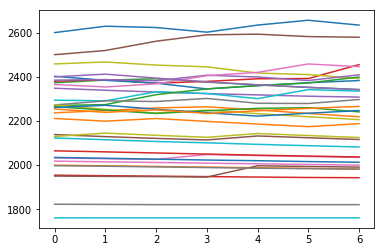

In [27]:
for row in range(elo_X.shape[0]):
    plt.plot(elo_X[row])

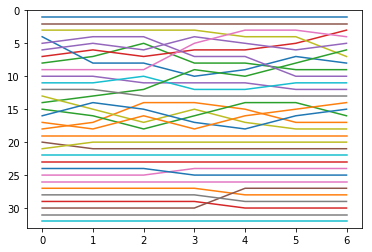

In [28]:
for row in range(seed_X.shape[0]):
    plt.plot(seed_X[row])
    plt.ylim(33,0)

In [29]:
# wins_X, elo_X, seed_X = tourn_sim_expanded(fighters_reseed, "ELO", "RESEED", sims=10000, elo_update=True, reseed_every_n_sim=1)

## plotting ELO on multiple reseed options

reseed count: 10000
Fighters re-seeded every 1 tournament run(s)
reseed count: 1000
Fighters re-seeded every 10 tournament run(s)
reseed count: 100
Fighters re-seeded every 100 tournament run(s)
reseed count: 10
Fighters re-seeded every 1000 tournament run(s)


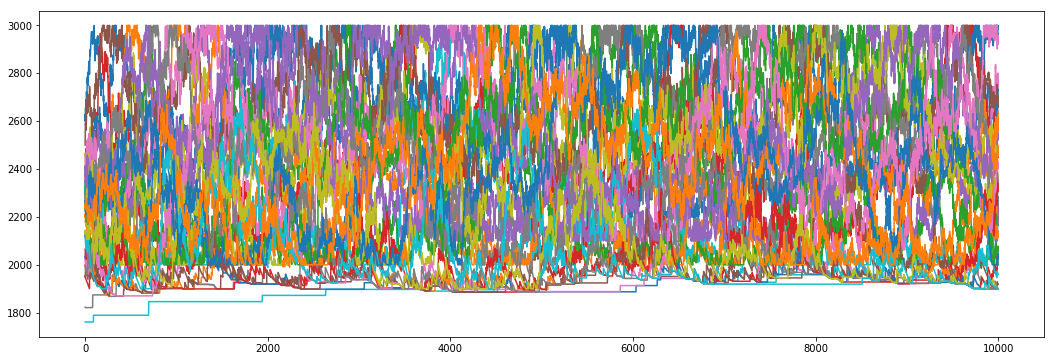

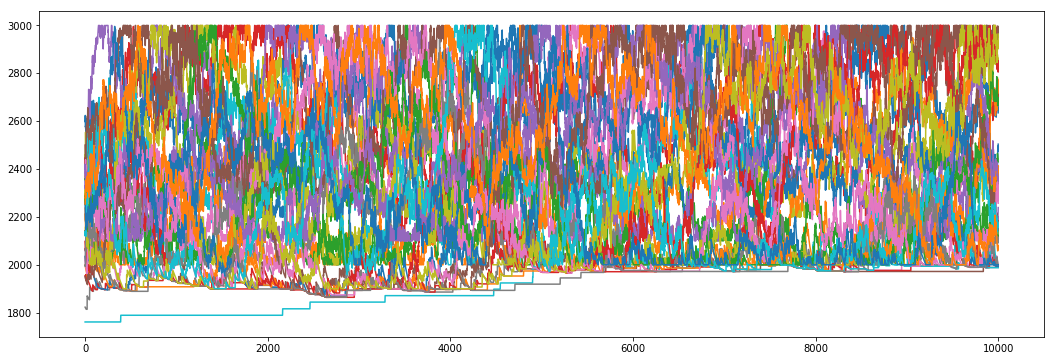

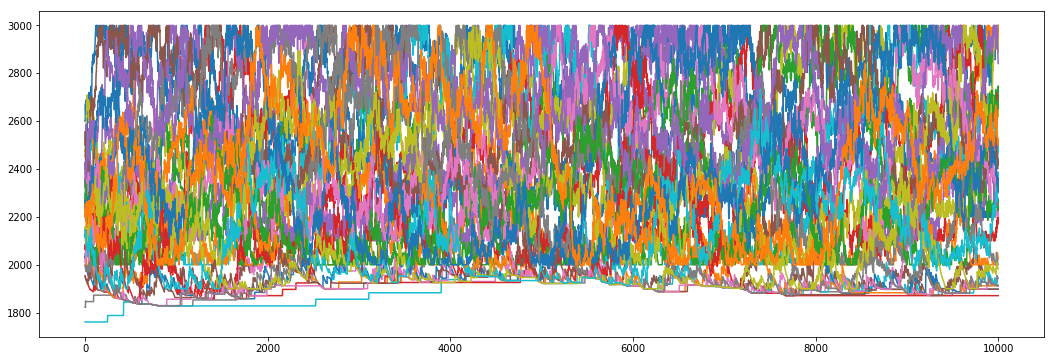

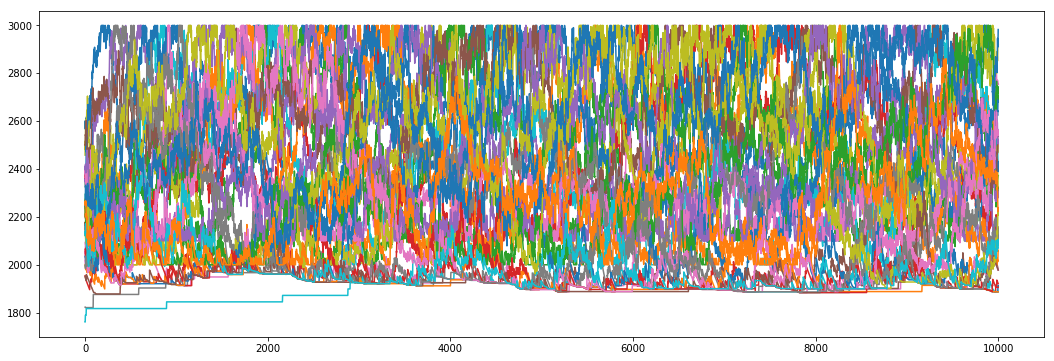

In [30]:
np.random.seed(8)

reseed_every = [1, 10, 100, 1000]

for i in range(len(reseed_every)):
    wins_X, elo_X, seed_X = tourn_sim_expanded(fighters_reseed, "ELO", "RESEED", 
                                               sims=10000, elo_update=True, 
                                               reseed_every_n_sim=reseed_every[i])
    
    
    plt.figure(figsize=(18,6))
    print("Fighters re-seeded every %i tournament run(s)" % reseed_every[i])
    for row in range(elo_X.shape[0]):
        plt.plot(elo_X[row])

## meh, unreadable (above); let's plot a subset to get an idea of movement; also, lets articulate basic statistics for each

In [31]:
from scipy import stats

In [32]:
stats.describe(seed_X[0])

DescribeResult(nobs=10001, minmax=(1.0, 12.0), mean=6.1997800219978005, variance=17.96048395160484, skewness=-0.1546819464571689, kurtosis=-1.633664092082662)

In [33]:
stats.describe(seed_X, axis=1)

DescribeResult(nobs=10001, minmax=(array([ 1.,  4.,  2.,  1.,  1., 14., 17., 21.,  3.,  3.,  1.,  1.,  2.,
       26.,  2.,  2.,  3.,  2.,  2., 22., 14., 23.,  5., 23.,  1., 22.,
        6.,  5.,  2., 18.,  1.,  7.]), array([12., 23., 18., 20., 22., 31., 30., 31., 16., 24., 16., 23., 24.,
       31., 20.,  9., 19., 23., 22., 32., 30., 32., 24., 32., 20., 32.,
       32., 30., 31., 31., 16., 22.])), mean=array([ 6.19978002, 14.09949005, 11.70003   , 10.60083992,  9.90120988,
       22.10018998, 25.59994001, 27.00039996,  9.00049995, 11.49995   ,
        7.20027997, 14.50084992, 12.50005   , 27.19998   , 10.70042996,
        4.70022998, 14.59884012, 12.10078992, 12.89891011, 29.00009999,
       21.80061994, 28.50034997, 14.7990201 , 27.10018998, 10.29977002,
       27.49985001, 22.19838016, 23.49945005, 10.20067993, 24.99960004,
        9.09919008, 14.90010999]), variance=array([17.96048395, 35.89260074, 32.810009  , 39.04705529, 16.90463954,
       23.49036096, 17.640036  , 10.60159984,

## not thrilled with scipy output; let's create a simple function

In [34]:
def simple_stats(array):
    return np.min(array), np.max(array), np.median(array), np.mean(array), np.var(array)

simple_stats_heading = ['min', 'max', 'median', 'mean', 'var']

df_wins_X = pd.DataFrame(wins_X)
df_wins_X.columns = ['1R', 'S16', 'QF', 'SF', 'F']

df_elo_X = pd.DataFrame(np.apply_along_axis(simple_stats, 1, elo_X))
elo_simple_stats_heading = ['elo_'+x for x in simple_stats_heading]
df_elo_X.columns = elo_simple_stats_heading

df_seed_X = pd.DataFrame(np.apply_along_axis(simple_stats, 1, seed_X))
seed_simple_stats_heading = ['seed_'+x for x in simple_stats_heading]
df_seed_X.columns = seed_simple_stats_heading

pd.concat([fighters.Fighter, df_wins_X, df_elo_X, df_seed_X], axis=1).head()

,Fighter,1R,S16,QF,SF,F,elo_min,elo_max,elo_median,elo_mean,elo_var,seed_min,seed_max,seed_median,seed_mean,seed_var
0,Ali,9661.0,6529.0,3167.0,1676.0,867.0,2400.0,3000.0,2607.0,2641.728427,31086.837357,1.0,12.0,8.0,6.19978,17.958688
1,Cotto,5890.0,3014.0,1392.0,581.0,243.0,2000.0,3000.0,2298.0,2348.324248,83754.030770,4.0,23.0,12.0,14.09949,35.889012
2,Hearns,6698.0,2470.0,933.0,376.0,157.0,2100.0,3000.0,2313.0,2367.795939,48394.765363,2.0,18.0,12.0,11.70003,32.806728
3,Lewis,7986.0,3912.0,2072.0,1060.0,488.0,2100.0,3000.0,2417.0,2480.831530,63877.782088,1.0,20.0,11.0,10.60084,39.043151
4,Jones,7927.0,3892.0,2030.0,1010.0,437.0,2100.0,3000.0,2417.0,2465.674043,57270.689338,1.0,22.0,12.0,9.90121,16.902949


reseed count: 10000
Fighters re-seeded every 1 tournament run(s)
reseed count: 1000
Fighters re-seeded every 10 tournament run(s)
reseed count: 100
Fighters re-seeded every 100 tournament run(s)
reseed count: 10
Fighters re-seeded every 1000 tournament run(s)


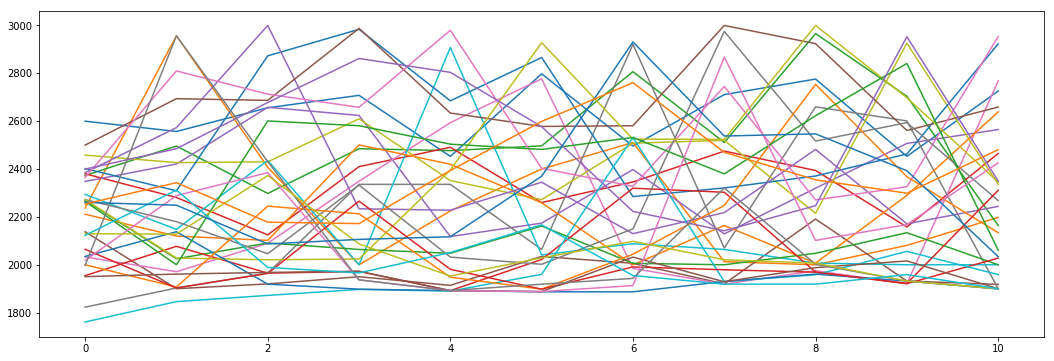

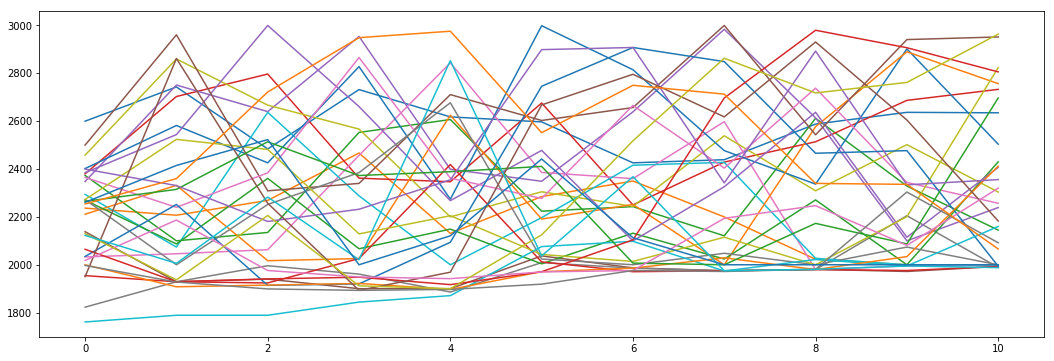

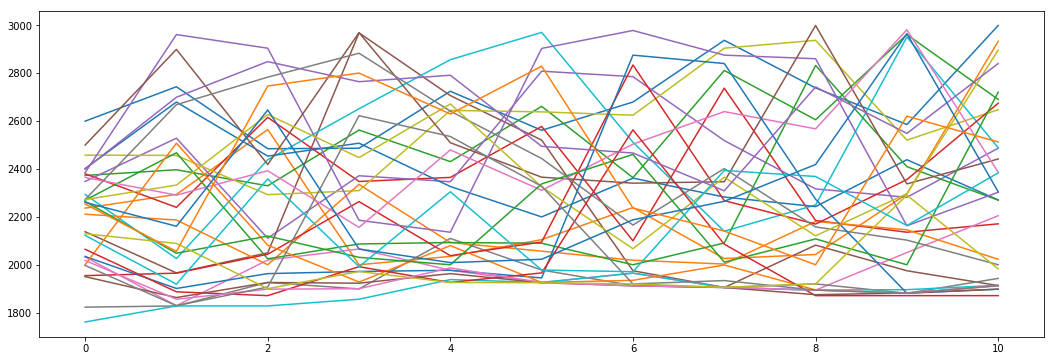

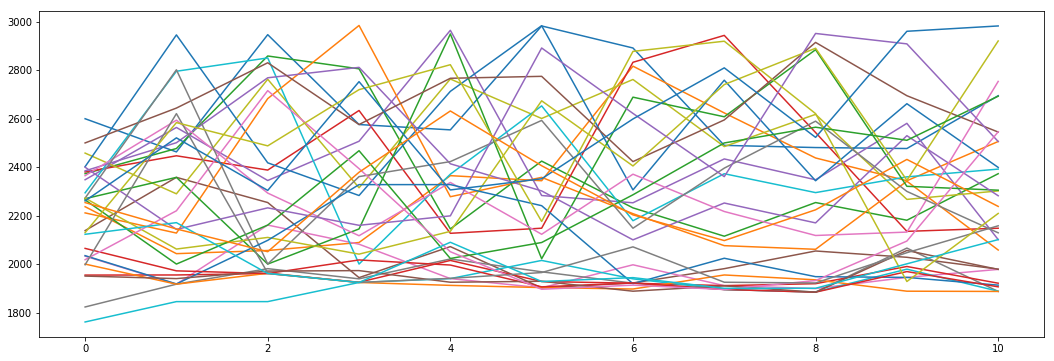

In [35]:
np.random.seed(8)

reseed_every = [1, 10, 100, 1000]

df_0001 = pd.DataFrame()
df_0010 = pd.DataFrame()
df_0100 = pd.DataFrame()
df_1000 = pd.DataFrame()

df_s = [df_0001, df_0010, df_0100, df_1000]

for i in range(len(reseed_every)):
    wins_X, elo_X, seed_X = tourn_sim_expanded(fighters_reseed, "ELO", "RESEED", 
                                               sims=10000, elo_update=True, 
                                               reseed_every_n_sim=reseed_every[i])
    
    df_wins_X = pd.DataFrame(wins_X)
    df_wins_X.columns = ['1R', 'S16', 'QF', 'SF', 'F']

    df_elo_X = pd.DataFrame(np.apply_along_axis(simple_stats, 1, elo_X))
    elo_simple_stats_heading = ['elo_'+x for x in simple_stats_heading]
    df_elo_X.columns = elo_simple_stats_heading

    df_seed_X = pd.DataFrame(np.apply_along_axis(simple_stats, 1, seed_X))
    seed_simple_stats_heading = ['seed_'+x for x in simple_stats_heading]
    df_seed_X.columns = seed_simple_stats_heading

    df_s[i] = pd.concat([fighters.Fighter, df_wins_X, df_elo_X, df_seed_X], axis=1)
    
    
    plt.figure(figsize=(18,6))
    print("Fighters re-seeded every %i tournament run(s)" % reseed_every[i])
    for row in range(elo_X.shape[0]):
        plt.plot(elo_X[row][np.arange(0, elo_X.shape[1]+1, 1000)])

In [36]:
df_0001, df_0010, df_0100, df_1000 = df_s[0], df_s[1], df_s[2], df_s[3]

In [37]:
df_0001.sort_values(by=['F'], ascending=False)

,Fighter,1R,S16,QF,SF,F,elo_min,elo_max,elo_median,elo_mean,elo_var,seed_min,seed_max,seed_median,seed_mean,seed_var
24,Leonard,8479.0,5522.0,3340.0,2129.0,1202.0,2100.000000,3000.0,2558.0,2579.484527,75142.979343,1.0,22.0,7.0,8.146285,35.119986
2,Hearns,8349.0,5398.0,3405.0,1913.0,986.0,2100.000000,3000.0,2588.0,2568.686849,77767.537458,1.0,23.0,7.0,8.426457,36.890527
15,Tyson,9651.0,7170.0,4172.0,1994.0,960.0,2300.000000,3000.0,2663.0,2669.198685,31448.588105,1.0,16.0,5.0,5.819118,13.291649
10,Chavez,8645.0,4961.0,3061.0,1725.0,867.0,2200.000000,3000.0,2531.0,2560.039604,63515.217875,1.0,20.0,9.0,8.567143,29.473369
16,Mayweather,8998.0,5249.0,2645.0,1321.0,666.0,2100.000000,3000.0,2545.0,2560.670423,46565.408588,1.0,21.0,8.0,8.252675,22.310818
0,Ali,9645.0,6398.0,2929.0,1336.0,641.0,2400.000000,3000.0,2599.0,2618.188181,23913.760408,1.0,15.0,7.0,6.683032,10.690652
30,Hagler,6935.0,3282.0,1725.0,980.0,519.0,2000.000000,3000.0,2375.0,2410.176659,79608.049919,1.0,28.0,12.0,12.118588,44.435092
22,Foreman,7693.0,4873.0,2254.0,969.0,476.0,2000.000000,3000.0,2550.0,2490.612034,76527.459472,1.0,28.0,8.0,10.287071,46.746807
7,Chocolatito,4722.0,2522.0,1390.0,803.0,428.0,1821.000000,3000.0,2183.0,2267.001285,121878.292426,1.0,32.0,18.0,17.181882,95.626653
17,Lomachenko,7021.0,3474.0,1621.0,786.0,419.0,2000.000000,3000.0,2389.0,2412.035441,75427.365410,1.0,26.0,12.0,12.002800,43.849607


In [38]:
np.mean(df_0001.seed_var), np.median(df_0001.seed_var)

(38.99593460499465, 36.00525666861371)

In [39]:
df_0010.sort_values(by=['F'], ascending=False)

,Fighter,1R,S16,QF,SF,F,elo_min,elo_max,elo_median,elo_mean,elo_var,seed_min,seed_max,seed_median,seed_mean,seed_var
15,Tyson,9452.0,6597.0,4112.0,2353.0,1304.0,2300.000000,3000.0,2665.0,2669.623543,48408.187481,1.0,17.0,5.0,6.239576,19.422255
4,Jones,8659.0,5628.0,3298.0,1869.0,1032.0,2100.000000,3000.0,2611.0,2594.461865,67706.550420,1.0,23.0,7.0,8.129887,32.774950
3,Lewis,9135.0,6008.0,3573.0,1871.0,929.0,2100.000000,3000.0,2644.0,2621.656447,54914.451765,1.0,21.0,6.0,7.404860,24.926680
31,GGG,8595.0,5907.0,3467.0,1778.0,896.0,2000.000000,3000.0,2628.0,2592.472534,70126.153620,1.0,30.0,6.0,8.134387,42.180320
25,Mosley,7023.0,5002.0,2948.0,1574.0,840.0,1865.000000,3000.0,2565.0,2479.105130,145468.194384,1.0,31.0,8.0,11.753625,99.845909
0,Ali,9599.0,6490.0,3015.0,1379.0,647.0,2400.000000,3000.0,2620.0,2635.476152,26942.564400,1.0,15.0,7.0,6.694131,10.643470
10,Chavez,8784.0,4928.0,2521.0,1215.0,593.0,2200.000000,3000.0,2523.0,2553.476161,49365.941536,1.0,19.0,9.0,8.805019,24.594519
16,Mayweather,7321.0,3882.0,1933.0,1019.0,518.0,2100.000000,3000.0,2450.0,2467.026087,73699.403141,1.0,23.0,11.0,11.041496,38.343944
23,Trinidad,3957.0,2441.0,1608.0,821.0,395.0,1865.000000,3000.0,2061.0,2238.804590,139787.586055,1.0,31.0,21.0,18.743526,106.759038
24,Leonard,7788.0,3966.0,1736.0,802.0,383.0,2100.000000,3000.0,2432.0,2470.911385,61927.719202,1.0,22.0,10.0,10.578242,31.577345


In [40]:
np.mean(df_0010.seed_var), np.median(df_0010.seed_var)

(42.18316223947048, 34.76422585718631)

In [41]:
df_0100.sort_values(by=['F'], ascending=False)

,Fighter,1R,S16,QF,SF,F,elo_min,elo_max,elo_median,elo_mean,elo_var,seed_min,seed_max,seed_median,seed_mean,seed_var
0,Ali,9739.0,7420.0,4577.0,2566.0,1359.0,2400.000000,3000.0,2690.0,2704.914909,35478.017457,1.0,14.0,4.0,5.189581,12.834372
24,Leonard,9691.0,7459.0,4455.0,2395.0,1309.0,2187.000000,3000.0,2694.0,2693.112565,37961.064746,1.0,15.0,5.0,5.499850,13.268898
15,Tyson,9215.0,5328.0,2891.0,1635.0,844.0,2300.000000,3000.0,2537.0,2584.569248,46403.134488,1.0,16.0,8.0,7.820418,19.667380
14,Pacquiao,8196.0,5029.0,2789.0,1465.0,765.0,2100.000000,3000.0,2538.0,2532.278054,70698.156969,1.0,21.0,8.0,9.120688,35.606772
17,Lomachenko,7518.0,4560.0,2537.0,1370.0,684.0,2000.000000,3000.0,2478.0,2483.017743,91042.006090,1.0,23.0,9.0,10.441156,46.035159
9,Morales,7248.0,4385.0,2244.0,1200.0,644.0,2000.000000,3000.0,2473.0,2458.378971,95778.611116,1.0,24.0,9.0,10.719928,48.936758
8,Duran,8774.0,4628.0,2207.0,1120.0,555.0,2200.000000,3000.0,2486.0,2525.272388,47940.730251,1.0,18.0,9.0,8.929907,24.622724
2,Hearns,8842.0,5311.0,2356.0,1058.0,492.0,2100.000000,3000.0,2562.0,2545.618456,50818.231507,1.0,20.0,8.0,8.539746,20.986946
30,Hagler,6263.0,2952.0,1717.0,873.0,439.0,2000.000000,3000.0,2318.0,2367.158361,84766.364490,1.0,25.0,14.0,13.250175,48.782928
31,GGG,7205.0,3920.0,1863.0,845.0,401.0,2000.000000,3000.0,2418.0,2431.348547,81818.324042,1.0,24.0,11.0,11.379762,42.471919


In [42]:
np.mean(df_0100.seed_var), np.median(df_0100.seed_var)

(34.48112817955282, 32.27974522815691)

In [43]:
df_1000.sort_values(by=['F'], ascending=False)

,Fighter,1R,S16,QF,SF,F,elo_min,elo_max,elo_median,elo_mean,elo_var,seed_min,seed_max,seed_median,seed_mean,seed_var
30,Hagler,9179.0,6213.0,3492.0,1992.0,1062.0,2050.000000,3000.0,2624.0,2624.097567,57484.622149,1.0,16.0,9.0,9.09919,23.694191
10,Chavez,8712.0,5203.0,3099.0,1656.0,872.0,2200.000000,3000.0,2570.0,2564.979610,63704.410025,1.0,16.0,6.0,7.20028,26.358148
0,Ali,9661.0,6529.0,3167.0,1676.0,867.0,2400.000000,3000.0,2607.0,2641.728427,31086.837357,1.0,12.0,8.0,6.19978,17.958688
28,Hopkins,7596.0,5310.0,2992.0,1620.0,860.0,1901.000000,3000.0,2583.0,2509.804102,112781.116651,2.0,31.0,7.0,10.20068,84.756148
15,Tyson,9546.0,6560.0,3602.0,1786.0,831.0,2300.000000,3000.0,2640.0,2642.640041,37125.761239,2.0,9.0,4.0,4.70023,5.409988
18,Holyfield,6361.0,4188.0,2534.0,1336.0,724.0,2000.000000,3000.0,2392.0,2430.382506,118498.502331,2.0,22.0,11.0,12.89891,47.497130
24,Leonard,7481.0,3911.0,1998.0,1084.0,581.0,2100.000000,3000.0,2422.0,2463.282248,72452.679402,1.0,20.0,8.0,10.29977,48.605668
14,Pacquiao,7446.0,3782.0,1847.0,939.0,493.0,2100.000000,3000.0,2400.0,2451.564926,70658.085958,2.0,20.0,10.0,10.70043,33.208528
3,Lewis,7986.0,3912.0,2072.0,1060.0,488.0,2100.000000,3000.0,2417.0,2480.831530,63877.782088,1.0,20.0,11.0,10.60084,39.043151
8,Duran,8731.0,5016.0,2302.0,975.0,451.0,2200.000000,3000.0,2536.0,2540.800435,47000.757326,3.0,16.0,7.0,9.00050,22.800220


In [44]:
np.mean(df_1000.seed_var), np.median(df_1000.seed_var)

(28.9230251057486, 25.026169515835136)

## notes

In [32]:
# rebracket

new_seeds = np.array(fighters_reseed.RESEED)

temp_bracket = new_seeds.copy()

folds = np.log2(len(new_seeds))

while folds > 0:
    if len(temp_bracket.shape) == 1:
        split_point = int(len(temp_bracket)/2)

        top_half = temp_bracket[:split_point]
        bot_half = np.flip(temp_bracket[split_point:], axis=0)

        temp_bracket = np.vstack((top_half, bot_half))

    else:
        split_point = int(temp_bracket.shape[1]/2)

        top_half = temp_bracket[:,:split_point]
        bot_half = np.flip(np.flip(temp_bracket[:,split_point:], 0), 1)

        temp_bracket = np.vstack((top_half, bot_half))
        
    folds -= 1


list(temp_bracket[:,0])[:8]

[1, 32, 17, 16, 9, 24, 25, 8]

(33, 0)

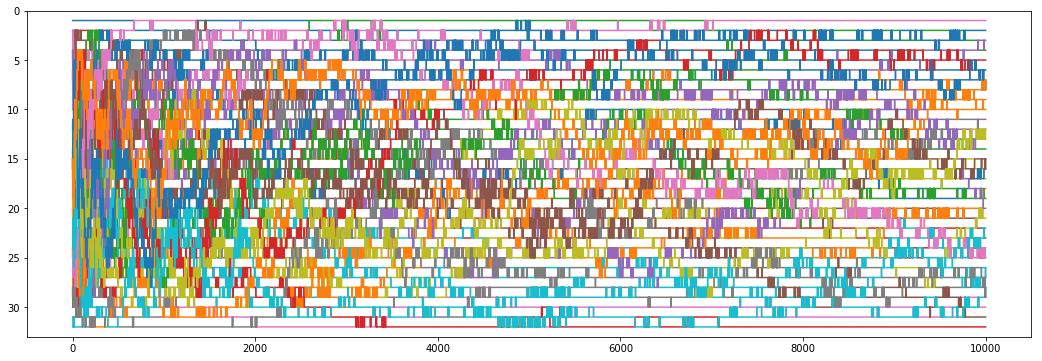

In [36]:
plt.figure(figsize=(18,6))

for row in range(seed_X.shape[0]):
    plt.plot(seed_X[row])
    

plt.ylim(33,0) 